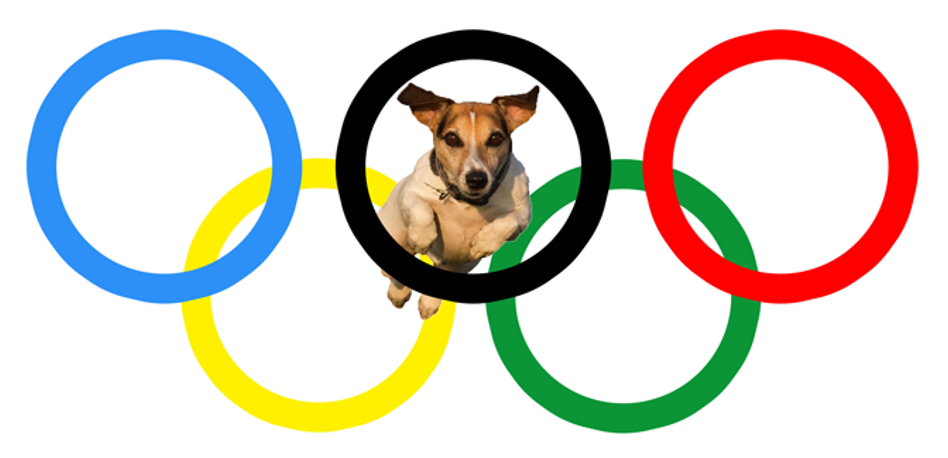



---


# **Pod Activity**

## **1. Probability, Odds, and Log(Odds)**

**a) To understand why the logit transformation is so helpful, let's start by creating a range of probability values between 0 and 1.**

In [ ]:
# Creating probabilities ranging from 0 to 1 by units of 0.001
prob <- seq(0, 1, by = 0.001)

**As a sanity check, let's review the range of these values:**

In [ ]:
# Check range of probabilities
range(prob)

**b) We will use the following equation to convert these probabilities to odds:**

$odds=\frac {probability} {1-probability}$

In [ ]:
# Converting from probability to odds
odds <- prob/(1-prob)

**What is the range of the odds?**

In [ ]:
# Check range of odds
range(odds)

**c) Now, we will natural log transform the odds.
In R,** ```log()``` **corresponds to the natural logarithm function.** 

In [ ]:
# Converting from odds to log(odds)
log_odds <- log(odds)

**What is the range of the log odds?**

In [ ]:
# Check range of log odds
range(log_odds)

**d) Finally, let's create a plot to visualize what we just learned about the range of probabilities, odds, and log odds.**

In [ ]:
# Loading packages
library(tidyverse)
library(ggplot2)

In [ ]:
# Creating a range plot - we are tricking R into giving us some pleasing visuals
# NOTE: Don't worry about the details of this code - just run and see what happens!
df <- data.frame(Quantity = c("Probability","Odds","Log(Odds)"), min = c(0,0,-21.5), max = c(1,21.5,21.5))
df  <- mutate(df, Quantity= factor(Quantity),
                Quantity = fct_relevel(Quantity,
                                    "Probability",
                                    "Odds",
                                    "Log(Odds)"))
ggplot(df, aes(x = Quantity))+
  geom_linerange(aes(ymin = min, ymax = max), color = "darkred", size=2)+
  geom_hline(yintercept=0, linetype='dashed') +
  labs(x = "", y = "Range") +
  scale_y_continuous(limits=c(-22,22), breaks = c(-20,-10,0, 10, 20)) +
  geom_point(x = 1, y= 1 ,size=3,color="darkred") +
  geom_point(x = 1, y= 0 ,size=3,color="darkred") +
  geom_point(x = 2, y= 0 ,size=3,color="darkred") +
  geom_segment(aes(x = 2, y = 21.5, xend = 2, yend = 22), color = "darkred", size=2, 
                 arrow = arrow(length = unit(0.5, "cm"))) +
  geom_segment(aes(x = 3, y = 21.5, xend = 3, yend = 22), color = "darkred", size=2,
               arrow = arrow(length = unit(0.5, "cm"))) +
  geom_segment(aes(x = 3, y = -21.5, xend = 3, yend = -22), color = "darkred", size=2,
               arrow = arrow(length = unit(0.5, "cm"))) +
  theme_minimal() +
  theme( 
    legend.position = "none",
    axis.line = element_line(colour = "black"),
    axis.text.x = element_text(color="black", size=16),
    axis.title.x = element_text(color="black", size=22, face="bold"),
    axis.title.y = element_text(color="black", size=22, face="bold"),
    axis.text.y = element_text(color="black", size=16, angle=90),
    panel.grid.major.y = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),)

##**2. Simulation**

**Unfortunately, we do not have access to real data from the 2021 Doggie Olympics, but we can simulate it!**

**Although it may sound daunting at first, simulation is an accessible and useful tool for understanding quantitative research methods.**

**Do you have some intuition for what we might be doing with this simulation code? Take a moment to discuss as a group, and then check out the brief description below.**

In [ ]:
# Simulating 2021 Doggie Olympics data
set.seed(0459)
n <- 1000
dogs <- data.frame(age = round(runif(n, 1, 12)),
                   treats = round(rpois(n, 5)),
                   medal = rbinom(n, 1, 0.23))
summary(dogs)

First, we set a random seed so that our random results will be replicable on multiple runs.

Next, we set the sample size, n, to 1000 observations

Finally, we create a dataframe called "dogs" which contains 3, randomly simulated variables based on 3 different probability distributions.

* The first variable, age, is randomly drawn from the Uniform distribution with a minimum value of 1 and a maximum value of 12.

* The second variable, treats, is randomly drawn from a Poisson distribution with an expected count of 5.

* The third variable, medal, is randomly drawn from a Bernoulli distribution with a probability of success of 0.23.

*NOTE: Don't worry if this feels new to you! We will be learning more about probability distributions coming up from Yiwen, and we will be building our knowledge of these concepts throughout the semester. Think of this is a small teaser.*

## **3. Logistic Model**

**We decide to fit a logistic regression model for the log odds of winning at least one medal as a function of age and treats. Write out the model that you would fit, and then fit that model using our simulated data (simply run the R code provided below). Do not include any product terms between age and treats.**

In [ ]:
# Type the model here or feel free to write it out on a piece of paper!

In [ ]:
# Fit the logistic regression model
dogs.logit <- glm(medal ~ age + treats, data=dogs, family=binomial(link="logit"))
summary(dogs.logit)

## **4. Predicted Probabilities From Log Odds**

**Based on the model we estimated, what is the predicted probability of winning at least one medal for a dog aged 4 years who consumes an average of 6 treats per day?**

If you wish to solve in R, note that the `exp()` function corresponds to the natural logarithm function.

In [ ]:
# Type your answer here or feel free to solve on a piece of paper!